## Practice
* Scrape all top 250 movies.
* Extract other movie characteristics (e.g., rating, director, stars).
* Find and scrape top 100 movies released in 2022.
* (Optional) Extract some elements (e.g., video features, 弹幕, comments) from some videos in Bilibili.

# IMDB

### Import Packages
- `import a`
- `import a.x`
- `import a as b`
- `from A import a`
- `from A import a as b`

In [1]:
# Scrap Method I
from requests import get

# Scrap Method II
import urllib.parse
import urllib.request

# Searching the Tree
import re # Regular Expression
from bs4 import BeautifulSoup as bs

# Dataframe
import pandas as pd

## Top 250 Movies

In [2]:
url1="https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start="
url2="&ref_=adv_nxt"
urls=[url1 + str(i) + url2 for i in range(1, 250, 50)]
urls

['https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=1&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=51&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=101&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=151&ref_=adv_nxt',
 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start=201&ref_=adv_nxt']

In [3]:
def scrape_movie(url):
    userHeader = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4) AppleWebKit/600.7.12 (KHTML, like Gecko) Version/8.0.7 Safari/600.7.12"}
    req = urllib.request.Request(url, headers=userHeader)
    response = urllib.request.urlopen(req)
    the_page = response.read()
    soup=bs(the_page,"html.parser")
    movie_containers = soup.find_all('div',{'class':'lister-item mode-advanced'})
    return movie_containers

movie_containers_top250 = [scrape_movie(url) for url in urls]

In [4]:
print(len(movie_containers_top250))
print(len(movie_containers_top250[0]))

5
50


In [5]:
# Nested list comprehension: [f(i) for j in k for i in j]
movie_containers_top250 = [movie for movie_containers in movie_containers_top250 for movie in movie_containers]
len(movie_containers_top250)

250

In [6]:
movie_names = [movie.h3.a.text for movie in movie_containers_top250]
movie_names

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Lord of the Rings: The Return of the King',
 "Schindler's List",
 'The Godfather Part II',
 '12 Angry Men',
 'Jai Bhim',
 'Pulp Fiction',
 'Inception',
 'The Lord of the Rings: The Two Towers',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Forrest Gump',
 'Il buono, il brutto, il cattivo',
 'The Matrix',
 'Goodfellas',
 'The Empire Strikes Back',
 "One Flew Over the Cuckoo's Nest",
 'Top Gun: Maverick',
 'Interstellar',
 'Cidade de Deus',
 'Sen to Chihiro no kamikakushi',
 'Saving Private Ryan',
 'The Green Mile',
 'La vita è bella',
 'Se7en',
 'Terminator 2: Judgment Day',
 'The Silence of the Lambs',
 'Star Wars',
 'Seppuku',
 'Shichinin no samurai',
 "It's a Wonderful Life",
 'Gisaengchung',
 'Whiplash',
 'The Intouchables',
 'The Prestige',
 'The Departed',
 'The Pianist',
 'Gladiator',
 'American History X',
 'The Usual Suspects',
 'Léon',
 'The Lion King',
 'Nuovo Cinema Paradiso',
 

In [7]:
len(movie_names)

250

In [8]:
def extract_year(movie):
    year_str = movie.find('span',{'class':'lister-item-year text-muted unbold'}).text
    year_int = int(re.findall("\d{4}", year_str)[0])
    return(year_int)

movie_years = [extract_year(movie) for movie in movie_containers_top250]
movie_years

[1994,
 1972,
 2008,
 2003,
 1993,
 1974,
 1957,
 2021,
 1994,
 2010,
 2002,
 1999,
 2001,
 1994,
 1966,
 1999,
 1990,
 1980,
 1975,
 2022,
 2014,
 2002,
 2001,
 1998,
 1999,
 1997,
 1995,
 1991,
 1991,
 1977,
 1962,
 1954,
 1946,
 2019,
 2014,
 2011,
 2006,
 2006,
 2002,
 2000,
 1998,
 1995,
 1994,
 1994,
 1988,
 1988,
 1985,
 1979,
 1979,
 1968,
 1960,
 1954,
 1942,
 1936,
 1931,
 2018,
 2019,
 2016,
 2018,
 2019,
 2018,
 2017,
 2012,
 2012,
 2009,
 2008,
 2006,
 2003,
 2000,
 1999,
 1997,
 1995,
 1985,
 1986,
 1984,
 1981,
 1981,
 1980,
 1963,
 1964,
 1957,
 1957,
 1950,
 1940,
 2020,
 2016,
 2012,
 2011,
 2010,
 2021,
 2009,
 2007,
 2010,
 2009,
 2004,
 2001,
 2000,
 2000,
 1997,
 1995,
 1995,
 1992,
 1987,
 1984,
 1983,
 1983,
 1973,
 1971,
 1968,
 1962,
 1962,
 1961,
 1960,
 1959,
 1958,
 1955,
 1952,
 1952,
 1948,
 1944,
 1941,
 1931,
 1927,
 1921,
 2019,
 2018,
 2022,
 2015,
 2009,
 2011,
 2010,
 2020,
 2013,
 2007,
 2005,
 2007,
 2006,
 2006,
 2005,
 2004,
 2004,
 2001,
 2003,

In [9]:
def extract_metascore(movie):
    movie_metascore = movie.find("span", {"class", "metascore"})
    if movie_metascore is not None:
        movie_metascore = int(movie_metascore.text)
    return(movie_metascore)

movie_metascores = [extract_metascore(movie) for movie in movie_containers_top250]
movie_metascores

[81,
 100,
 84,
 94,
 94,
 90,
 96,
 None,
 94,
 74,
 87,
 66,
 92,
 82,
 90,
 73,
 90,
 82,
 84,
 78,
 74,
 79,
 96,
 91,
 61,
 59,
 65,
 75,
 85,
 90,
 85,
 98,
 89,
 96,
 88,
 57,
 66,
 85,
 85,
 67,
 62,
 77,
 64,
 88,
 80,
 94,
 87,
 94,
 89,
 80,
 97,
 100,
 100,
 96,
 99,
 75,
 59,
 79,
 87,
 78,
 68,
 81,
 81,
 78,
 67,
 95,
 89,
 77,
 80,
 84,
 76,
 68,
 None,
 84,
 88,
 85,
 86,
 66,
 90,
 97,
 None,
 90,
 None,
 None,
 90,
 None,
 77,
 95,
 80,
 71,
 88,
 None,
 92,
 69,
 89,
 69,
 55,
 68,
 70,
 95,
 76,
 79,
 76,
 75,
 65,
 58,
 83,
 77,
 84,
 88,
 100,
 60,
 94,
 98,
 100,
 None,
 99,
 91,
 None,
 95,
 100,
 None,
 98,
 None,
 78,
 69,
 81,
 94,
 80,
 71,
 63,
 88,
 75,
 92,
 None,
 93,
 98,
 62,
 70,
 82,
 80,
 72,
 69,
 90,
 64,
 66,
 90,
 90,
 77,
 73,
 68,
 85,
 65,
 72,
 96,
 57,
 89,
 78,
 94,
 91,
 None,
 92,
 74,
 86,
 93,
 98,
 87,
 75,
 None,
 85,
 98,
 98,
 98,
 86,
 97,
 None,
 None,
 None,
 None,
 88,
 65,
 84,
 77,
 86,
 77,
 88,
 79,
 71,
 96,
 74,
 81,
 93

In [10]:
movie_df = pd.DataFrame({"name":movie_names, "year":movie_years, "metascore":movie_metascores})
movie_df

,name,year,metascore
0,The Shawshank Redemption,1994,81.0
1,The Godfather,1972,100.0
2,The Dark Knight,2008,84.0
3,The Lord of the Rings: The Return of the King,2003,94.0
4,Schindler's List,1993,94.0
...,...,...,...
245,Mr. Smith Goes to Washington,1939,73.0
246,It Happened One Night,1934,87.0
247,The Incredibles,2004,90.0
248,Aladdin,1992,86.0


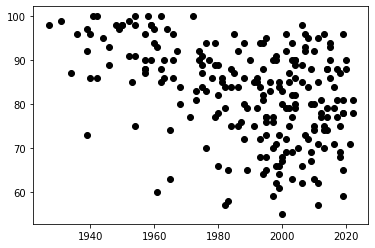

In [11]:
# A Quick Visualization
import matplotlib.pyplot as plt
import numpy as np
movie_df["ranking"] = np.arange(len(movie_df))

plt.scatter("year", "metascore", c="black", data=movie_df)
plt.show()

# Bilibili

## Danmu

In [12]:
from requests import get
url = "https://www.bilibili.com/video/BV1MN4y177PB"
response = get(url)
soup = bs(response.text, 'html.parser')
soup

<!DOCTYPE html>
<html lang="zh-Hans"><head itemprop="video" itemscope="" itemtype="http://schema.org/VideoObject"><meta content="telephone=no, email=no" name="format-detection"/><meta charset="utf-8" content="text/html" http-equiv="Content-Type"/><meta content="333.788" name="spm_prefix"/><meta content="no-referrer-when-downgrade" name="referrer"/><meta content="pc" name="applicable-device"/><meta content="no-transform" http-equiv="Cache-Control"/><meta content="no-siteapp" http-equiv="Cache-Control"/><link href="//s1.hdslb.com/bfs/static/jinkela/long/laputa-css/map.css" rel="stylesheet"/><link href="//s1.hdslb.com/bfs/static/jinkela/long/laputa-css/light_u.css" rel="stylesheet"/><link href="//s1.hdslb.com/bfs/static/jinkela/long/laputa-css/light.css" id="__css-map__" rel="stylesheet"/><script type="text/javascript">window.webAbTest={"pc_player_autoplay_switch_reset":"1","buvidsplit":"12","remove_back_version_splitNum":8,"login_dialog_version_splitNum":28,"remove_back_version":"SHOW","

In [14]:
cid = re.findall("(?<=\"cid\":)\d+", response.text)[0]
url = "https://comment.bilibili.com/"+cid+".xml"
url

'https://comment.bilibili.com/783037295.xml'

In [15]:
import requests
import xmltodict

response = requests.get(url)
danmu_dict = xmltodict.parse(response.content)
danmu_dict

OrderedDict([('i',
              OrderedDict([('chatserver', 'chat.bilibili.com'),
                           ('chatid', '783037295'),
                           ('mission', '0'),
                           ('maxlimit', '1500'),
                           ('state', '2'),
                           ('real_name', '0'),
                           ('source', 'k-v'),
                           ('d',
                            [OrderedDict([('@p',
                                           '611.68700,1,25,16777215,1659072071,0,4a26cd9f,1107135795283878400,11'),
                                          ('#text', '敬二舅')]),
                             OrderedDict([('@p',
                                           '604.43900,1,25,16777215,1659071979,0,fcd47b41,1107135024110718208,11'),
                                          ('#text', '敬二舅')]),
                             OrderedDict([('@p',
                                           '612.66900,1,25,15138834,1659071851,0,d19b1bc0,110713395

In [16]:
int(danmu_dict['i']['maxlimit'])

1500

In [17]:
danmu_list = danmu_dict['i']['d']
danmu_list

[OrderedDict([('@p',
               '611.68700,1,25,16777215,1659072071,0,4a26cd9f,1107135795283878400,11'),
              ('#text', '敬二舅')]),
 OrderedDict([('@p',
               '604.43900,1,25,16777215,1659071979,0,fcd47b41,1107135024110718208,11'),
              ('#text', '敬二舅')]),
 OrderedDict([('@p',
               '612.66900,1,25,15138834,1659071851,0,d19b1bc0,1107133950754598912,11'),
              ('#text', '敬二舅')]),
 OrderedDict([('@p',
               '592.71600,1,25,16777215,1659071710,0,945edb80,1107132769663825920,11'),
              ('#text', '致二舅')]),
 OrderedDict([('@p',
               '657.57900,1,25,16777215,1659071595,0,b79e0451,1107131800176033280,11'),
              ('#text', '敬二舅')]),
 OrderedDict([('@p',
               '591.66600,1,25,16777215,1659071517,0,8e6a47f9,1107131147483220992,11'),
              ('#text', '敬二舅')]),
 OrderedDict([('@p',
               '665.97600,1,25,16646914,1659071418,0,b582c77c,1107130313714362368,11'),
              ('#text', '敬二舅')]),

In [18]:
len(danmu_list)

1800

In [19]:
danmu_list[0]['@p']

'611.68700,1,25,16777215,1659072071,0,4a26cd9f,1107135795283878400,11'

In [20]:
danmu_position_list = [danmu_list[id]['@p'] for id in range(len(danmu_list))]
danmu_position_list

['611.68700,1,25,16777215,1659072071,0,4a26cd9f,1107135795283878400,11',
 '604.43900,1,25,16777215,1659071979,0,fcd47b41,1107135024110718208,11',
 '612.66900,1,25,15138834,1659071851,0,d19b1bc0,1107133950754598912,11',
 '592.71600,1,25,16777215,1659071710,0,945edb80,1107132769663825920,11',
 '657.57900,1,25,16777215,1659071595,0,b79e0451,1107131800176033280,11',
 '591.66600,1,25,16777215,1659071517,0,8e6a47f9,1107131147483220992,11',
 '665.97600,1,25,16646914,1659071418,0,b582c77c,1107130313714362368,11',
 '596.40300,1,25,16777215,1659071333,0,f3bb1644,1107129603199291392,11',
 '686.47600,1,25,16777215,1659071229,0,2955522c,1107128728057707776,11',
 '594.77700,1,25,16777215,1659071151,0,bd7c2496,1107128076640414464,11',
 '594.81900,1,25,16777215,1659071049,0,858a8d1f,1107127225012112640,11',
 '586.33900,1,25,16777215,1659070956,0,9e2b2531,1107126440425589504,11',
 '445.84100,1,25,16777215,1659070845,0,fef702ac,1107125510623866624,11',
 '588.01000,1,25,16777215,1659070779,0,f8a10df4,110

In [21]:
danmu_df = pd.DataFrame([danmu_position_list[i].split(",") for i in range(len(danmu_position_list))])
danmu_df.columns = ["time", "position", "font", "html_color", "post_datetime", "type", "sender", "rowid", "unknown"]

In [22]:
danmu_df

,time,position,font,html_color,post_datetime,type,sender,rowid,unknown
0,611.68700,1,25,16777215,1659072071,0,4a26cd9f,1107135795283878400,11
1,604.43900,1,25,16777215,1659071979,0,fcd47b41,1107135024110718208,11
2,612.66900,1,25,15138834,1659071851,0,d19b1bc0,1107133950754598912,11
3,592.71600,1,25,16777215,1659071710,0,945edb80,1107132769663825920,11
4,657.57900,1,25,16777215,1659071595,0,b79e0451,1107131800176033280,11
...,...,...,...,...,...,...,...,...,...
1795,634.62400,1,25,16777215,1659032006,0,3b68c405,1106799703674584832,3
1796,460.66700,1,25,16777215,1659031715,0,57748866,1106797260567488256,3
1797,669.81200,1,25,11890,1659031359,0,21273394,1106794276110508288,3
1798,620.14200,1,25,16777215,1659031020,0,896cae89,1106791433144193536,3


In [23]:
bool(re.search('敬二舅', danmu_list[0]['#text']))

True

In [24]:
danmu_text_list = [danmu_list[id]['#text'] for id in range(len(danmu_list))]
danmu_text_list

['敬二舅',
 '敬二舅',
 '敬二舅',
 '致二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '二舅真的脑子很好啊',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬礼',
 '敬二舅',
 '敬二舅',
 '字写的真好看啊',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '泪目了',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅！',
 '敬二舅',
 '活着这个现实，就十分有力量',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '就是突然想到外公外婆，就真的哭了。',
 '致敬，非常治愈',
 '说实话，我感觉毕十三比不上二舅(哈哈)',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '进而就',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '他好厉害啊',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '年度最佳纪录片《我的二舅》',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '二舅超酷的呜呜呜',
 '敬二舅',
 '时也命也……',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '六边形战士二舅',
 '伟大的二舅',
 '命运开了个玩笑而已',
 '致敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '说毕十三的那个，如果你能看见我的弹幕，希望能能联系到你',
 '敬二舅',
 '敬二舅',
 '人可以平凡，但不能自甘平庸',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '可惜了，不说那个医生，说不定能为祖国作出巨大贡献！',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅',
 '敬二舅！',


In [25]:
danmu_df["text"] = danmu_text_list
danmu_df

,time,position,font,html_color,post_datetime,type,sender,rowid,unknown,text
0,611.68700,1,25,16777215,1659072071,0,4a26cd9f,1107135795283878400,11,敬二舅
1,604.43900,1,25,16777215,1659071979,0,fcd47b41,1107135024110718208,11,敬二舅
2,612.66900,1,25,15138834,1659071851,0,d19b1bc0,1107133950754598912,11,敬二舅
3,592.71600,1,25,16777215,1659071710,0,945edb80,1107132769663825920,11,致二舅
4,657.57900,1,25,16777215,1659071595,0,b79e0451,1107131800176033280,11,敬二舅
...,...,...,...,...,...,...,...,...,...,...
1795,634.62400,1,25,16777215,1659032006,0,3b68c405,1106799703674584832,3,敬二舅
1796,460.66700,1,25,16777215,1659031715,0,57748866,1106797260567488256,3,哈哈哈哈哈哈
1797,669.81200,1,25,11890,1659031359,0,21273394,1106794276110508288,3,敬二舅
1798,620.14200,1,25,16777215,1659031020,0,896cae89,1106791433144193536,3,敬二舅


In [26]:
danmu_df[~danmu_df['text'].str.contains("敬二舅")]

,time,position,font,html_color,post_datetime,type,sender,rowid,unknown,text
3,592.71600,1,25,16777215,1659071710,0,945edb80,1107132769663825920,11,致二舅
12,445.84100,1,25,16777215,1659070845,0,fef702ac,1107125510623866624,11,二舅真的脑子很好啊
16,617.41600,1,25,16777215,1659070532,0,15128c66,1107122882296807424,11,敬礼
19,484.61900,1,25,15138834,1659070235,0,ede0d0c0,1107120392138692864,11,字写的真好看啊
27,677.02800,1,25,16777215,1659069382,0,5741d6b,1107113240959375360,11,泪目了
...,...,...,...,...,...,...,...,...,...,...
1757,407.26500,1,25,16777215,1659055726,0,6dfa7dd8,1106998680801586688,3,不公已过，走向未来
1759,417.20400,1,25,16777215,1659055252,0,a209ff27,1106994702856646400,3,拽面吗
1783,661.01900,1,25,16777215,1659041391,0,f5522967,1106878429602639360,3,满分作文
1787,649.83500,1,25,16777215,1659036690,0,cbcbac11,1106838999445552384,3,你币有了


# Dynamic Website

## Build the webdriver

In [2]:
# Import modules for use
import os
from selenium import webdriver
import time
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException
from bs4 import BeautifulSoup as bs

In [8]:
# Install Driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Open the url and establish a connection
url = "https://www.bilibili.com/video/BV1MN4y177PB"
driver.implicitly_wait(5)
driver.maximize_window()
driver.get(url)

[WDM] - Downloading: 100%|██████████| 6.21M/6.21M [00:01<00:00, 5.34MB/s]


Remember to use “inspect” in Chrome or other web browser to view the HTML code.

In [9]:
# Pause the video
from selenium.webdriver.common.by import By
pause = driver.find_element(By.XPATH, '//video')
pause.click()
time.sleep(1)

In [12]:
# Close the login notification window
title = driver.find_element(By.XPATH, "//div[@class='close']")
title.click()
time.sleep(1)

In [13]:
# Expand the danmu list
danmu_button = driver.find_element(By.XPATH, '//span[@class="arrow-icon"]')
danmu_button.click()
time.sleep(1)

ElementClickInterceptedException: Message: element click intercepted: Element <span class="arrow-icon">...</span> is not clickable at point (860, 8). Other element would receive the click: <div class="bili-header__bar mini-header">...</div>
  (Session info: chrome=104.0.5112.81)


## Another way to extract danmu

In [14]:
# Read and parse the first page
first_page = driver.page_source
first_page

soup = bs(first_page,"html.parser")

# Extract danmus on the screen
danmus = soup.find_all("div",{"class":"dm-info-row"})
print(danmus)

[]


Unfortunately, there is no efficient way to view more danmus by using webdriver.

So the previous method is the best solution at present.

In [15]:
from selenium.webdriver.common.action_chains import ActionChains
first_danmu = driver.find_element(By.XPATH,'//ul[@class="bui-long-list-list"]//li[1]')
third_danmu = driver.find_element(By.XPATH,'//ul[@class="bui-long-list-list"]//li[3]')
first_danmu.click()
time.sleep(1)
drag = driver.find_element(By.XPATH,'//div[@class="bscroll-indicator"]')
ActionChains(driver).drag_and_drop(first_danmu, third_danmu).perform()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//ul[@class="bui-long-list-list"]//li[1]"}
  (Session info: chrome=104.0.5112.81)


In [16]:
# This line should drag the scroll bar down by 20 pixels.
# But somehow it does not work, so just for your reference.
ActionChains(driver).drag_and_drop_by_offset(drag, 0 , 20).perform()

NameError: name 'drag' is not defined

## Extract comments

In [17]:
# Read and parse the first page
first_page = driver.page_source
first_page

soup = bs(first_page,"html.parser")

In [18]:
# Extract likes
likes = soup.find_all("span",{"class":"reply-like"})
print(likes[0])

<span class="reply-like" data-v-84710b5a=""><i class="svg-icon like use-color like-icon" data-v-84710b5a="" style="--78307116:16px;"><svg class="icon" height="200" p-id="3323" t="1636093575017" version="1.1" viewbox="0 0 1024 1024" width="200" xmlns="http://www.w3.org/2000/svg"><path d="M594.176 151.168a34.048 34.048 0 0 0-29.184 10.816c-11.264 13.184-15.872 24.064-21.504 40.064l-1.92 5.632c-5.632 16.128-12.8 36.864-27.648 63.232-25.408 44.928-50.304 74.432-86.208 97.024-23.04 14.528-43.648 26.368-65.024 32.576v419.648a4569.408 4569.408 0 0 0 339.072-4.672c38.72-2.048 72-21.12 88.96-52.032 21.504-39.36 47.168-95.744 63.552-163.008a782.72 782.72 0 0 0 22.528-163.008c0.448-16.832-13.44-32.256-35.328-32.256h-197.312a32 32 0 0 1-28.608-46.336l0.192-0.32 0.64-1.344 2.56-5.504c2.112-4.8 5.12-11.776 8.32-20.16 6.592-17.088 13.568-39.04 16.768-60.416 4.992-33.344 3.776-60.16-9.344-84.992-14.08-26.688-30.016-33.728-40.512-34.944zM691.84 341.12h149.568c52.736 0 100.864 40.192 99.328 98.048a845.8

In [19]:
likes[0].find("span").text

'460512'

In [20]:
# Extract likes in one step
likes = [x.find("span").text for x in soup.find_all("span",{"class":"reply-like"})]
print(likes)

['460512', '195118', '58279', '71400', '108567', '176878', '166578', '163009', '70377', '62325', '42729', '26958', '39403', '21521', '35835', '59949', '18053', '11343', '16312', '27780']


In [21]:
# Extract reply time
datetimes = [x.text for x in soup.find_all("span", {"class", "reply-time"})]
print(datetimes)

['2022-07-25 08:36', '2022-07-26 17:50', '2022-07-26 15:02', '2022-07-26 13:27', '2022-07-25 19:57', '2022-07-25 11:37', '2022-07-25 09:28', '2022-07-25 12:17', '2022-07-25 09:07', '2022-07-25 09:35', '2022-07-25 09:10', '2022-07-25 11:17', '2022-07-25 08:43', '2022-07-25 08:37', '2022-07-25 08:05', '2022-07-25 11:25', '2022-07-25 09:53', '2022-07-25 11:22', '2022-07-25 11:10', '2022-07-25 11:57']


In [22]:
# Extract comments
comments = [x.text for x in soup.find_all("span", {"class", "reply-content root-reply"})] 
print(comments)

['这期视频的文案，真是看几遍也看不够的，愿称其为一种冷峻的幽默感。看似置身事外淡淡地叙述，偶有玩笑话穿插其间，文字背后的情感却足以动人至落泪。配合上几乎不加额外修饰的镜头画面，这部视频便不再是普通的视频，更像是一部微缩的纪录片，一场时长极短的电影，似乎有些乏善可陈，匆匆而过转眼就迎来结束，这又何其像是“普通人的一生”。', '遗憾在电影里是主角崛起的前戏遗憾在生活里是让人沉沦的毒药', '尊唐真的很有才', '这样的“二舅”或许并不少，缺乏的或是如此洞见的“侄子”吧', '“不要光赞美高耸的山峰，平原和丘陵也一样不朽”', '拉帮套，旧俗，是指在过去由于丈夫患重病，不能抚养妻室、赡养老人时，在征得丈夫同意后，另外寻找一名心地善良的男人担负全家生活，丈夫去世后与此男人结为正式夫妻继续生活，现今这种习俗已近绝迹。', '天才少年老了会变成什么样？会变成天才老头', '我本想说二舅的人生有种悲苦的浪漫，但又意识到，这样去评价也太浅薄了。', '这行文，这语言，这背后的人和事。词藻不华丽但深邃，故事不跌宕起伏但引人入胜。世上第一快乐的人就是不需对别人负责的人，第二快乐的人就是从不回头看的人，遗憾谁没有呢。排除万难去争取胜利。看完的最后，替老人家淡淡的遗憾，又有淡淡的暖心。', '虽然在世俗上，二舅一事无成。但在我看来，二舅是人中龙凤', '中国人老说生老病死，但生死之间何苦又加个老病呢？这可不是上天的不仁，而是怜悯。不然我们每个人都在七八十岁却还康健力壮之年去世，那对这个世界该有多么的留恋呢？那不是更加的痛苦吗？从这个意义上来讲，老病是生死之间的必要演习。', '让我想起来农村的家人 我从头哭到尾 我经常在想 如果把他们能在暑天中午顶着大太阳浇地热到要中暑累得要死掉、在闷热的工厂里枯燥地一坐一整天叠着1包1毛钱的塑料袋叠到腰酸背痛、在工地上顶着太阳做帮工、在马路边戴着帽子拔草、枯燥重复性地搬运箱子等等那种吃苦耐劳的精神放到我身上，我就能耐心专心地坐在书桌前学习了，我甚至早就考上更好的大学而不仅仅是一个本科。我真得愧疚自责又心疼，小时候觉得有时候他们“可恨”，每次深夜那种带着心痛感的默声哭泣都是源于和他们的矛盾。但现在长大了，愈发能理解他们的想法不再苛责什么，愈发觉得心疼，觉得他们可敬，枯燥劳累重复低价值不体面疲惫狼狈充斥着他们每日的工作，他们却能日日坚持维持家庭的运转、每

In [23]:
len(comments)

20

Extract more comments

In [24]:
# Scroll down to the bottom of the page
#driver.execute_script("window.scrollTo(0,window.scrollY+300)")
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

# Bilibili will then load more comments
# So do this for multiple times.

In [25]:
for i in range(10):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(5)


In [26]:
# Read and parse the first page
first_page = driver.page_source
first_page

soup = bs(first_page,"html.parser")

# Extract comments
comments = [x.text for x in soup.find_all("span", {"class", "reply-content root-reply"})]
len(comments) # It should be 240 if you have only run the above lines.

240

In [29]:
newlist = list(filter(re.compile("苦难").match, comments)) # Read Note below
print(newlist)

['苦难并不值得歌颂', '苦难就是苦难 并不酷 希望以后看到二舅好起来', '苦难就是生活的话，那我选择离开……我不想成为“二舅”', '苦难终究是苦难，是包装后变成了励志。', '苦难无法使人更高贵，反而使人更卑微。所以，旁观者不要去歌颂苦难，而是应该消除苦难。——毛姆']
